In [79]:
from sklearn.manifold import t_sne
from sklearn.cluster import KMeans
import matplotlib.pyplot
%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
from bs4 import BeautifulSoup
import numpy as np

import snowballstemmer
import nltk
from nltk.corpus import stopwords  
import unicodedata
import requests
import re

import pandas as pd

titles = []
for j in range(1,20):
    pg = "http://www.dagospia.com/home/"+str(j)+".htm"
    page = requests.get(pg).content
    soup = BeautifulSoup(page)

    letters = soup.findAll("h1", class_="titolo")
    for element in letters:
        titles.append(unicodedata.normalize('NFKD', element.text.lower()).encode('ascii','ignore'))

In [81]:
titles_clean = [re.sub(r"[^a-zA-Z0-9]+", ' ', k)  for t in titles for k in t.split("\n")]

while '' in titles_clean:
    titles_clean.remove('')

In [82]:
df = pd.read_csv('negative.txt', header=None, names=['text'])
negatives = df['text'].values

df = pd.read_csv('positive.txt', header=None, names=['text'])
positives= df['text'].values

In [ ]:
scores = []
for title in titles_clean:
    score = 0
    for p in positives:
        if title.lower().find(p) >= 0:
            score += 1
    for p in negatives:
        if title.lower().find(p) >= 0:
            score -= 1

    scores.append(score)

(array([  1.,   5.,   9.,   7.,  18.,  34.,  24.,  10.,   0.,   1.]),
 array([-14. , -11.6,  -9.2,  -6.8,  -4.4,  -2. ,   0.4,   2.8,   5.2,
          7.6,  10. ]),
 <a list of 10 Patch objects>)

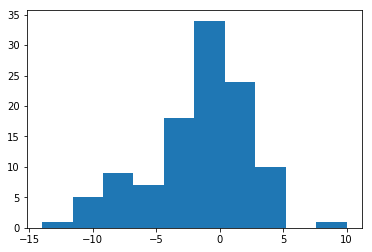

In [78]:
plt.hist(scores)

In [39]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    import re
    text = text.lower()
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if (re.search('[a-zA-Z]', token)) and not(token in stopwords.words('italian')):
            filtered_tokens.append(token)
    stemmer = snowballstemmer.stemmer('italian')
    stems = [stemmer.stemWord(t) for t in filtered_tokens]
    return stems

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.99
                                   , max_features=20000
                                   , min_df=0.01
                                   , stop_words=stopwords.words('italian') + ['-']
                                   , use_idf=True
                                   , tokenizer=tokenize_and_stem
                                   , ngram_range=(1,3))

tfidefer = tfidf_vectorizer.fit(titles)
tfidf_matrix = tfidefer.transform(titles) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

(109, 565)


In [42]:
mod = KMeans(n_clusters=2)
mod.fit(tfidf_matrix)
preds = mod.predict(tfidf_matrix)

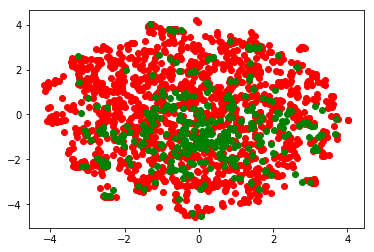

In [43]:
plt.scatter(Y[preds==0, 0], Y[preds==0, 1], c="r")
plt.scatter(Y[preds==1, 0], Y[preds==1, 1], c="g")

In [39]:
tsne = t_sne.TSNE(n_components=2
                  , perplexity=200.0
                  , early_exaggeration=4.0
                  , learning_rate=1000.0
                  , n_iter=1000
                  , n_iter_without_progress=30
                  , min_grad_norm=1e-07
                  , metric='euclidean'
                  , init='random'
                  , verbose=0
                  , random_state=None
                  , method='barnes_hut'
                  , angle=0.5)

Y = tsne.fit_transform(tfidf_matrix.toarray())
plt.scatter(Y[preds==0, 0], Y[preds==0, 1], c="r")
plt.scatter(Y[preds==1, 0], Y[preds==1, 1], c="g")

NameError: name 'preds' is not defined

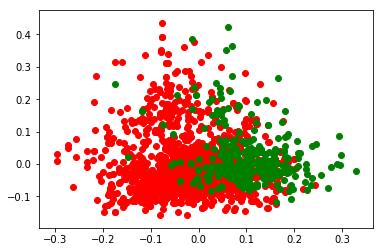

In [44]:
Y = t_sne.PCA(n_components=2).fit_transform(tfidf_matrix.toarray())
plt.scatter(Y[preds==0, 0], Y[preds==0, 1], c="r")
plt.scatter(Y[preds==1, 0], Y[preds==1, 1], c="g")

In [34]:
final = ''
for el in titles:
    final = final + ' ' + el
filalss = final.split()
filtered = [w for w in filalss if not w in stopwords.words('italian')+['-']]  

In [35]:
fd=nltk.FreqDist(filtered)

In [36]:
fd.pprint(maxlen=100)

FreqDist({'piu': 311, 'video': 254, 'dopo': 236, 'anni': 188, 'fa': 157, 'solo': 151, "e'": 132, 'ecco': 121, 'stato': 120, 'due': 119, 'prima': 115, 'poi': 105, 'essere': 105, 'fatto': 102, 'quando': 100, 'perche': 94, 'milioni': 92, 'ce': 91, 'ora': 90, 'fare': 89, 'euro': 86, 'mai': 84, 'senza': 83, 'sempre': 79, 'grande': 74, 'foto': 73, 'roma': 73, 'vuole': 70, 'stata': 69, 'casa': 68, 'sesso': 64, 'aver': 63, 'donne': 63, 'presidente': 62, 'cosa': 61, 'gia': 59, 'storia': 58, 'oggi': 57, 'ancora': 56, 'cosi': 56, 'weinstein': 55, 'de': 53, 'tre': 52, 'va': 52, '5': 52, 'nuovo': 52, 'italia': 51, 'pure': 51, 'parla': 50, 'mondo': 49, 'puo': 49, 'governo': 49, 'mila': 49, 'trump': 46, 'fino': 45, 'fuori': 45, 'ogni': 44, 'primo': 44, 'renzi': 44, 'donna': 44, "piu'": 44, '10': 44, 'uomo': 44, 'far': 44, 'quel': 43, 'film': 43, 'tv': 42, 'stati': 42, 'sara': 42, 'secondo': 42, 'viene': 42, 'fra': 41, 'lex': 41, 'altri': 41, 'me': 41, 'tempo': 40, 'fine': 40, 'sotto': 39, 'altro': 39